In [77]:
import pandas as pd 
from string import printable
st = set(printable)


FILE = 'Proceedings_Filtered'
df = pd.DataFrame.from_csv('../Data/'+FILE+'.csv')
df.content = df.content.str.replace('/',' ') 
df.content = df.content.str.replace(',',' ') 
df.content = df.content.str.replace('(',' ')
df.content = df.content.str.replace(')',' ') 
df.content = df.content.str.replace('"','\'') 
df["content"] = df["content"].apply(lambda x: ''.join([" " if  i not in  st else i for i in x]))

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys


In [78]:
df['len'] = df.content.str.len()

In [79]:
len(df)

10019

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE261D828>]],
      dtype=object)

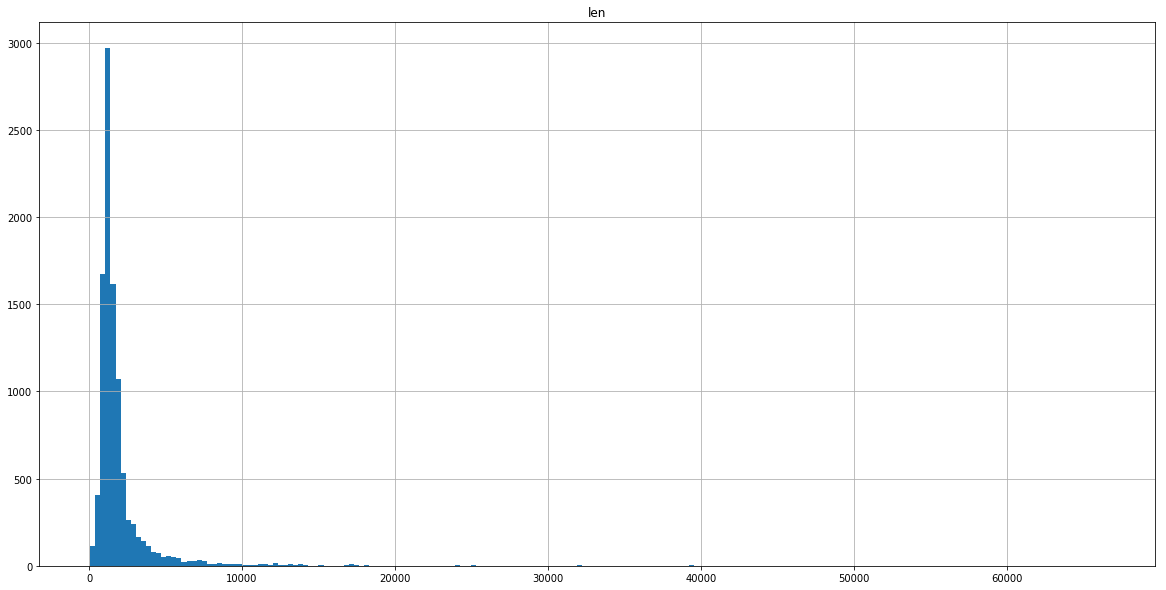

In [80]:
df.hist(column='len', bins=200, figsize=(20,10))

In [85]:
len(df[df.len>4000])

586

In [86]:
df = df[df.len<4000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE3129940>]],
      dtype=object)

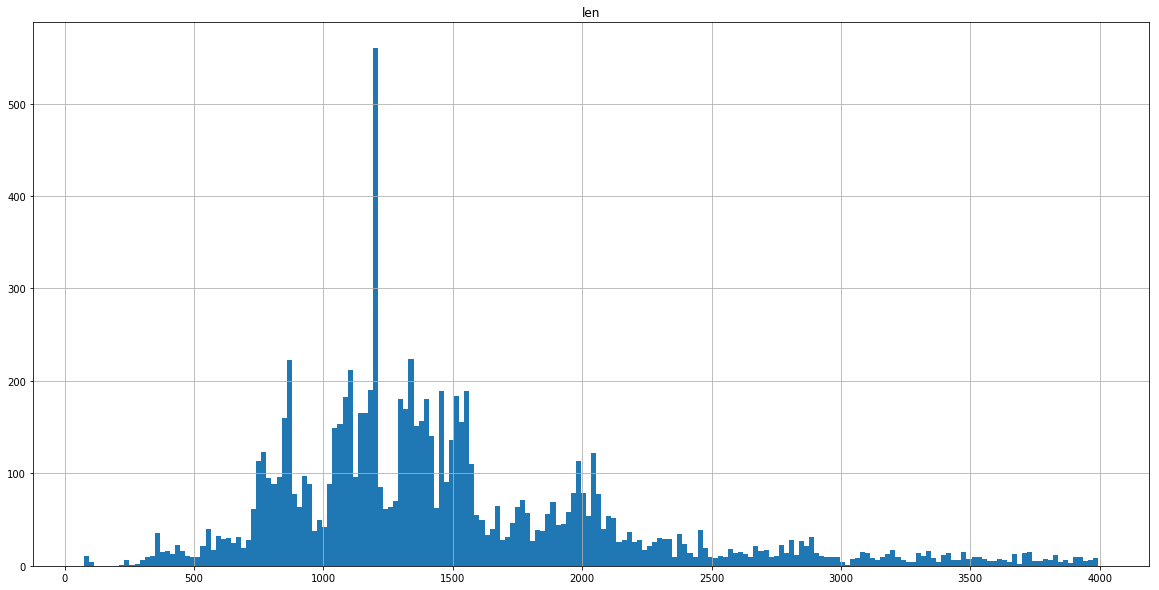

In [87]:
df.hist(column='len', bins=200, figsize=(20,10))

In [88]:
df = df.sort_values(by=['state','len'])
df.to_csv('../Data/'+FILE+'.csv')

In [89]:
import nltk
import csv
import string
import re
from nltk import ngrams
from collections import Counter

non_speaker = re.compile('[A-Za-z]+: (.*)')

def untokenize(ngram):
    tokens = list(ngram)
    return "".join([" "+i if not i.startswith("'") and \
                             i not in string.punctuation and \
                             i != "n't"
                          else i for i in tokens]).strip()

def extract_phrases(text, phrase_counter, length):
    for sent in nltk.sent_tokenize(text):
        strip_speaker = non_speaker.match(sent)
        if strip_speaker is not None:
            sent = strip_speaker.group(1)
        words = nltk.word_tokenize(sent)
        for phrase in ngrams(words, length):
            if all(word not in string.punctuation for word in phrase):
                phrase_counter[untokenize(phrase)] += 1

In [90]:
phrase_counter = Counter()

def get_phrase(row):
    extract_phrases(row, phrase_counter, 3)
    return 

In [91]:
df.content.apply(get_phrase)
print('Done')

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: generator 'ngrams' raised StopIteration


Done


In [92]:
print(len(df))

9295


In [93]:
most_common_phrases = phrase_counter.most_common(100)
for k,v in most_common_phrases:
    print('{0: <5}'.format(v), k)

5481  at a point
5437  water will be
4436  arizona revised statutes
3996  response to the
3911  of each year
3904  notice is hereby
3899  is hereby given
3800  point of diversion
3731  a distance of
3630  located within the
3607  or at a
3607  a point from
3607  point from which
3563  from which the
3446  hereby given that
3386  will be used
3285  be used for
2938  of said section
2918  a copy of
2917  corner of said
2914  4 of section
2839  a point located
2837  point located within
2760  with the court
2727  to the adoption
2725  consent to the
2717  has been scheduled
2713  m or at
2710  that on the
2710  to the state
2690  application to the
2685  the state engineer
2683  made application to
2683  state engineer of
2683  engineer of nevada
2683  of nevada for
2679  for permission to
2678  nevada for permission
2676  jason king p.e
2673  to the petition
2666  given that on
2642  you do not
2635  guardianship of a
2621  of a minor
2617  if you do
2606  you have the
2529  title 25 cha